<a href="https://colab.research.google.com/github/codewithsrs/data-analysis/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,make_scorer,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
telco = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine learning/logistic regresssion/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [216]:
telco['Churn'].value_counts()/telco.shape[0]

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [217]:
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [218]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [219]:
telco.drop('customerID',axis=1,inplace = True)

In [220]:
telco.gender.unique()

array(['Female', 'Male'], dtype=object)

In [221]:
telco.SeniorCitizen.unique()

array([0, 1])

In [222]:
li = list(telco.TotalCharges.unique())

In [223]:
telco[telco.TotalCharges == ...]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [224]:
for i in li:
  try:
    float(i)
  except:
    print(f'cant convert {i} to float')

cant convert   to float


In [225]:
telco[telco.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [226]:
telco['TotalCharges'].mask(telco['TotalCharges'] == ' ',0,inplace = True)

In [227]:
telco.TotalCharges = telco.TotalCharges.astype(float)

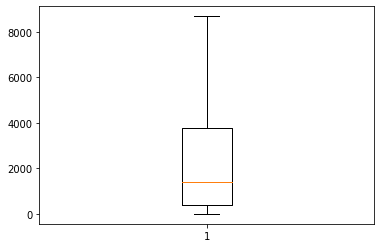

In [228]:
plt.boxplot(telco.TotalCharges)
plt.show()

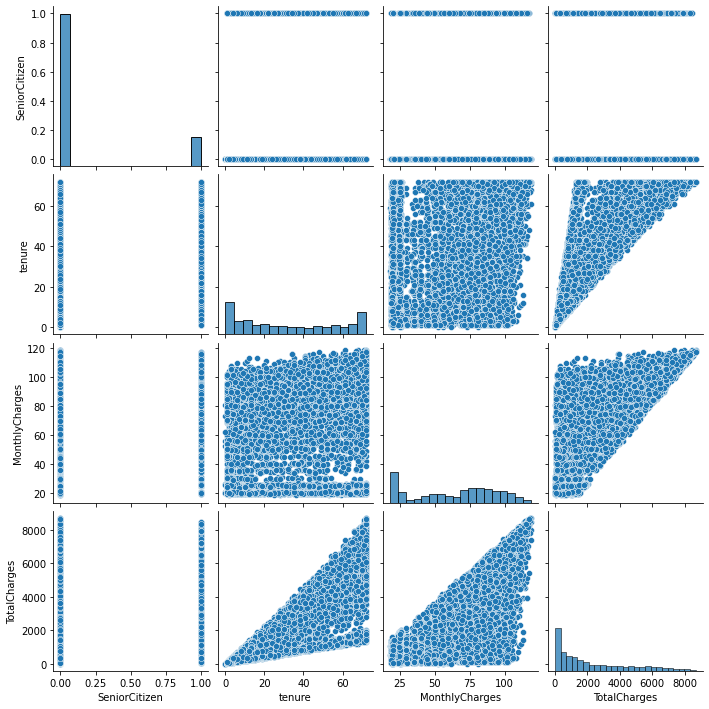

In [229]:
sns.pairplot(telco)

In [230]:
telco.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


In [231]:
telco.drop('tenure',axis = 1,inplace = True)

In [232]:
telco.MonthlyCharges.mean()

64.76169246059922

In [233]:
telco['TotalCharges'].mask(telco['TotalCharges']==0,64.76,inplace = True)

In [234]:
ob = telco.dtypes == object
cat_cols = telco.columns[ob]

In [235]:
le = LabelEncoder()
ohc = OneHotEncoder()
for col in cat_cols:
  if col == 'Churn':
    pass
  else:
    dat = le.fit_transform(telco[col]).astype(int)
    telco = telco.drop(col,axis = 1)
    new_dat = ohc.fit_transform(dat.reshape(-1,1))
    n_cols = new_dat.shape[1]
    col_name = ['_'.join([col,str(x)]) for x in range(n_cols)]
    new_df = pd.DataFrame(new_dat.toarray(),index = telco.index,columns = col_name)
    telco = pd.concat([telco,new_df],axis=1)

In [236]:
telco.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_0,gender_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,29.85,29.85,No,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,56.95,1889.50,No,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [237]:
x_d = telco.drop('Churn',axis = 1)
y_d = telco['Churn']

In [238]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler,PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline

In [239]:
m = MinMaxScaler()
m.fit_transform(x_d)

array([[0.        , 0.11542289, 0.0012751 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.38507463, 0.21586661, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.35422886, 0.01031041, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.11293532, 0.03780868, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.55870647, 0.03321025, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.86965174, 0.78764136, ..., 0.        , 0.        ,
        0.        ]])

In [240]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x_d,y_d , test_size = 0.3, random_state = 42)

In [241]:
kf = KFold(shuffle=True, random_state=42, n_splits=4)
lr = LogisticRegression(C = 10.0,max_iter = 10000)

In [242]:

lr.fit(x_train, y_train)

LogisticRegression(C=10.0, max_iter=10000)

In [243]:
lr.predict_proba(x_train)

array([[0.92523685, 0.07476315],
       [0.30166609, 0.69833391],
       [0.95543118, 0.04456882],
       ...,
       [0.83161908, 0.16838092],
       [0.19972502, 0.80027498],
       [0.95763471, 0.04236529]])

In [244]:
lr.predict_proba(x_test)

array([[0.48678034, 0.51321966],
       [0.85967186, 0.14032814],
       [0.97682826, 0.02317174],
       ...,
       [0.98575885, 0.01424115],
       [0.47133185, 0.52866815],
       [0.73932577, 0.26067423]])

In [245]:
train_class_preds= lr.predict(x_train)

In [246]:
test_class_preds = lr.predict(x_test)

In [247]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

In [248]:
train_accuracy

0.8004056795131845

In [249]:
test_accuracy

0.807382867960246

In [250]:
kf = KFold(shuffle=True, random_state=42, n_splits=5)
w = {'No':73,'Yes':27}

In [313]:
from sklearn.model_selection import GridSearchCV
lcr = LogisticRegression(solver = 'liblinear',class_weight = w,max_iter = 10000)

# Same estimator as before
estimator = Pipeline([("logistic_regression", lcr)])

params = {
    'logistic_regression__penalty': ['l1','l2'],
    'logistic_regression__C': np.geomspace(0.0000000000000000000000001,30,80)
}
scoring = {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,pos_label = 'No'),'f1':make_scorer(f1_score,pos_label = 'No'),'recall':make_scorer(recall_score,pos_label = 'No')}
grid = GridSearchCV(estimator, params,scoring = scoring,refit = 'precision',cv=5)

In [314]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logistic_regression',
                                        LogisticRegression(class_weight={'No': 73,
                                                                         'Yes': 27},
                                                           max_iter=10000,
                                                           solver='liblinear'))]),
             param_grid={'logistic_regression__C': array([1.00000000e-25, 2.16348273e-25, 4.68065754e-25, 1.01265218e-24,
       2.19085550e-24, 4.73987805e-24, 1.02546443e-23, 2.21857459e-23,
       4.79984783e-23, 1.03843879e-22,...
       1.35221958e-01, 2.92550371e-01, 6.32927676e-01, 1.36932810e+00,
       2.96251770e+00, 6.40935590e+00, 1.38665308e+01, 3.00000000e+01]),
                         'logistic_regression__penalty': ['l1', 'l2']},
             refit='precision',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_sco

In [315]:
grid.best_score_

0.7639805474607758

In [316]:
grid.best_estimator_

Pipeline(steps=[('logistic_regression',
                 LogisticRegression(C=13.866530815329844,
                                    class_weight={'No': 73, 'Yes': 27},
                                    max_iter=10000, solver='liblinear'))])

In [317]:
grid.cv_results_

{'mean_fit_time': array([0.02864861, 0.0242197 , 0.02106853, 0.02241402, 0.01930661,
        0.01928277, 0.02225862, 0.01989613, 0.02026315, 0.02237926,
        0.01969609, 0.01944537, 0.02318606, 0.0194984 , 0.02070427,
        0.02180657, 0.01922865, 0.01936035, 0.01942806, 0.01866598,
        0.01914921, 0.02077255, 0.01928363, 0.01936369, 0.01979895,
        0.0199038 , 0.0194335 , 0.0192296 , 0.01938605, 0.01934752,
        0.01945152, 0.01910977, 0.02025514, 0.01929398, 0.02070079,
        0.01958847, 0.01935005, 0.01898561, 0.02031088, 0.0207572 ,
        0.01958494, 0.01917744, 0.01935492, 0.01940513, 0.01961522,
        0.0193706 , 0.0191329 , 0.01908941, 0.01958861, 0.01892953,
        0.01952653, 0.01881914, 0.02063689, 0.01905184, 0.02109942,
        0.02013335, 0.02041602, 0.01917486, 0.01939998, 0.01972303,
        0.01925654, 0.01968675, 0.02026448, 0.01902089, 0.02186494,
        0.01941586, 0.01977382, 0.02018886, 0.01984444, 0.02003493,
        0.01946731, 0.02112408,

In [318]:
grid.best_params_

{'logistic_regression__C': 13.866530815329844,
 'logistic_regression__penalty': 'l2'}

In [319]:
grid.best_index_

157

In [320]:
y_pred = grid.predict(x_test)

In [321]:
accuracy_score(y_test,y_pred)

0.7624230951254141

In [322]:
precision_score(y_test,y_pred,pos_label = 'No')

0.7606837606837606

In [323]:
recall_score(y_test,y_pred,pos_label = 'No')

0.9831059129304743

In [324]:
confusion_matrix(y_test,y_pred)

array([[1513,   26],
       [ 476,   98]])

In [325]:
f1_score(y_test,y_pred,pos_label = 'No')

0.8577097505668934